# Getting started with images 

### Load some helpful packages: cv2 and skimage (new)

In [1]:
import matplotlib.pyplot as plt 
from skimage import data
import numpy as np
import cv2 as cv
coffee = data.coffee()
coins = data.coins()
#https://www.tutorialspoint.com/dip/dip_quick_guide.htm

In [2]:
## Simplify ploting 

def plot_grey(im):
    plt.imshow(im,cmap='gray')
    
def im_subplot(ims,shape,titles=None):
    
    if titles == None:
        titles =[str(" ") for i in range(len(ims))]
    for i,im in enumerate(ims): 
        i+=1
        ct= shape[0]*100 + shape[1]*10 + i
        plt.subplot(ct)
        plt.title(titles[i-1])
        plot_grey(im)

### What are Images? 

- Effectively 2D Signal $f(x,y)$ vs $f(x)$ for a 1D signal
- Generally range from 0 --> 255
- Lets show this 

### Create fake image with random int pixel values:

Text(0.5, 1.0, 'Grey Scale "Spectrum"')

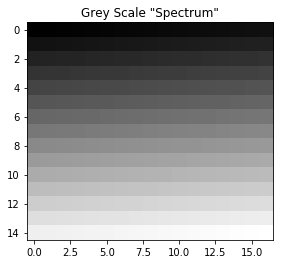

In [3]:
spec= np.array(list(range(0,255))).reshape((15,17))
plot_grey(spec)
plt.title('Grey Scale "Spectrum"')

### Color in images?

Black Pixel = 0 

Grey Pixel = $\frac{2^{bpp}}{2}$ ~ 127/128

White Pixel = $2^{bpp}$ where bpp = bites per pixel (8 in this case) and thus white == 255

#of bits of image = #rows x #columns x #bpp
#of bytes of image = #rows x #columns
#of kilobytes of image = #rows x #columns x #bpp/1024

--- 

#### We can add color by including another dimension with 3 layers representing the magnitude of color (RGB)

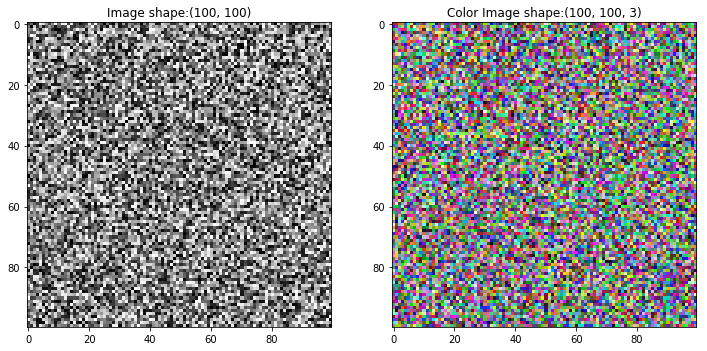

In [4]:
plt.figure(figsize=(12,10))
size=100
dumb_image, dumb_image_color= np.random.randint(low=0,high=255, size=(size, size)), np.random.randint(low=0,high=255, size=(size, size,3))

titles = ['Image shape:{}'.format(dumb_image.shape),'Color Image shape:{}'.format(dumb_image_color.shape) ]                           
im_subplot([dumb_image,dumb_image_color],shape=[1,2],titles=titles)


### Other Colors 

8 bits for R , 8 bits for G , 8 bits for B == 24 Bits 

RED: [255,0,0] :: `plt.imshow(np.array([255,0,0]).reshape(1,1,3))`

GREEN: [0,255,0] :: `plt.imshow(np.array([0,255,0]).reshape(1,1,3))`

BLUE: [0,0,255] :: `plt.imshow(np.array([0,0,255]).reshape(1,1,3))`'

GREY: [128,128,128] :: `plt.imshow(np.array([128,128,128]).reshape(1,1,3))`'





### Isolating Colors 

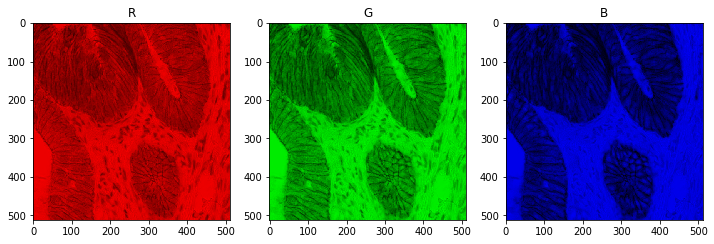

In [5]:
import warnings

def color_isolation(img,return_colors=False):  
    """
    Takes in an image and isolates it into 
    R,G,B color counter parts. 
    
    """
    
    dim = np.zeros(img.shape[0:2]).astype(int)
    if len(img.shape)==2:
        R,G,B= img,img,img
        warnings.warn("Image should have 3 dims including color channels")
    else:
        R,G,B=img[:,:,0],img[:,:,1],img[:,:,2]
        
    plt.figure(figsize=(12,10))
    
    im_subplot([np.stack((R,dim,dim), axis=2),np.stack((dim,G,dim), axis=2),
                np.stack((dim,dim,B), axis=2)],shape=[1,3], 
               titles=['R','G','B'] )

    if return_colors==True:
        return R,G,B
    
color_isolation(data.immunohistochemistry())



## Converting from RGB --> Grey Scale 

Method 1: Averaging the Channels? 
- Doesn't work because 33% of Red,	33% of Green, 33% of Blue does not consider wavelength intensity
- Red (~ 665nm) + Green (~540nm) + Blue (~470nm)

Method 2: "Luminosity method"

- New grayscale image = ( (0.3 * R) + (0.59 * G) + (0.11 * B) ).

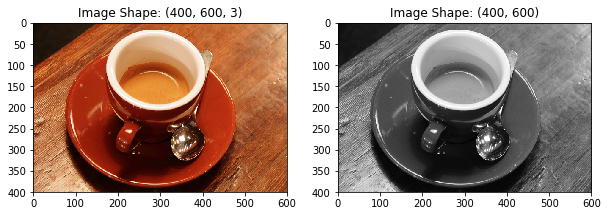

In [6]:
def rgb2gray(rgb):
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray



plt.figure(figsize=(10,20))
titles= ['Image Shape: {}'.format(coffee.shape),'Image Shape: {}'.format(rgb2gray(coffee).shape)]
im_subplot([coffee,rgb2gray(coffee)],shape=[1,2], titles=titles)
plt.show()


In [97]:
image =data.checkerboard().astype(float)
from scipy.ndimage.filters import convolve
kernel = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])



def convolve2d(image, kernel):
    m, n = kernel.shape
    if (m == n):
        y, x = image.shape
        y = y - m + 1
        x = x - m + 1
        new_image = np.zeros((y,x))
        for i in range(y):
            for j in range(x):
                new_image[i][j] = np.sum(image[i:i+m, j:j+m]*kernel) 
    return new_image

np.array_equal(convolve2d(image, kernel),convolve(image, kernel))

False

In [94]:
%%time
convolve(image, kernel)
2

CPU times: user 962 µs, sys: 545 µs, total: 1.51 ms
Wall time: 697 µs


In [95]:
%%time
convolve2d(image, kernel)
2

CPU times: user 225 ms, sys: 1.84 ms, total: 227 ms
Wall time: 226 ms


In [80]:
np.unique(convolve2d(image, kernel))

array([-121.,  -94.,  -85.,  -55.,  -50.,  -49.,  -44.,    0.,  255.,
        299.,  304.,  305.,  310.,  340.,  349.,  376.])

## Image Zoom 

### Simple zoom by duplicating the number of pixels 

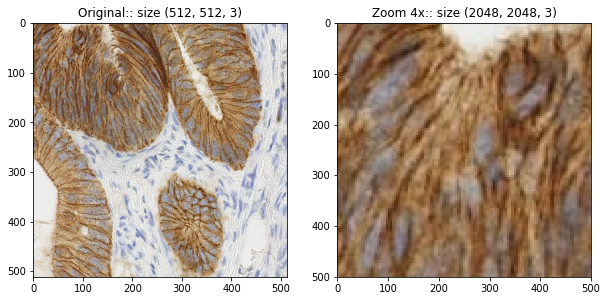

In [7]:
plt.figure(figsize=(10,10))

def zoom_dup(x,factor=2):
    x= np.repeat(x, factor, axis=1)
    x= np.repeat(x, factor, axis=0)
    return x

immuno = data.immunohistochemistry()
zoom =4 
zoomed_im= zoom_dup(immuno,factor=zoom)
titles=['Original:: size {}'.format(immuno.shape),
      'Zoom {}x:: size {}'.format(zoom,zoomed_im.shape)]
im_subplot([immuno,zoomed_im],
          shape=[1,2],titles=titles )

plt.xlim(0,500)
plt.ylim(500,0)
plt.show()

## Image Resolution 

Clarity of image != Number of pixels 
Clarity of image = Number of pixels/inch (fixed unit) 

Looking at the zoomed image above, although the image is zoomed and is a larger image, it is less clear than its counter part (in a 500 x 500 pixel range) 

PPI:: On a phone #DIAG PIXELS / DIAG LEN
DPI:: (printers) 

## Grey Level Resolution 

number of bits per pixel (BPP)

BPP = depth of color (see above - generally 8 bits w range 0--255)
(Can be understood as 256 different shades of grey) 




In [8]:
def grey_level_adjust(img,grey_levels):
    """
    color_range= 2^(#bits)
    Adjust grey scale color 
    """
    grey_levels-=255
    grey_levels=abs(grey_levels)

    return (img/grey_levels).astype(int)*grey_levels

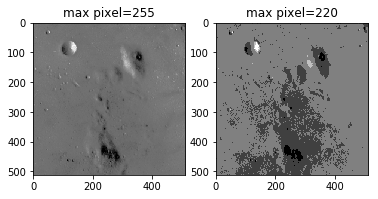

In [9]:
plt.subplot(121)
plt.title('max pixel={}'.format(np.max(data.moon())))
plt.imshow(data.moon(),cmap='gray')

plt.subplot(122)
bit_adj= grey_level_adjust(data.moon(),200)
plt.title('max pixel={}'.format(np.max(bit_adj)))
plt.imshow(bit_adj,cmap='gray')

# Canny Edge Detection Algorithm 
### (for grey scaled images) 

1. Noise Reduction
2. Gradient Calculation 
3. Non-maximum Suppression 
4. Double Threshold 
5. Edge Tracking by Hysteresis 


## Noise Reduction 

Apply a gaussian blur to smooth an image 

## $Result = \frac{1}{2\pi\sigma} *exp(-\frac{(i-(k+1))^2+(j-(k+1))^2}{2\sigma^2})$



In [10]:
def gaussian_kernel(size, sigma=1):
    size = int(size) // 2
    x, y = np.mgrid[-size:size+1, -size:size+1]
    normal = 1 / (2.0 * np.pi * sigma**2)
    g =  np.exp(-((x**2 + y**2) / (2.0*sigma**2))) * normal
    return g

coffee_gray= rgb2gray(data.coffee())


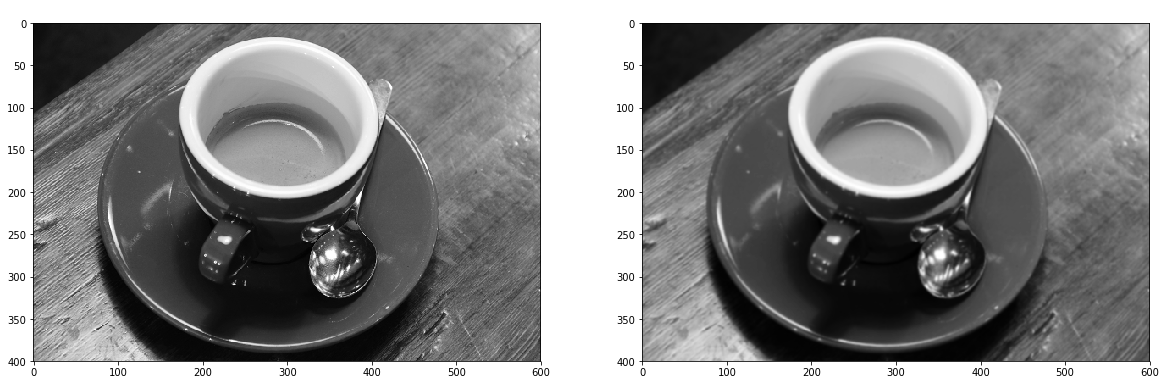

In [12]:
plt.figure(figsize=(20,20))
from scipy.ndimage.filters import convolve
smoothed = convolve(coffee_gray,gaussian_kernel(55,1))
im_subplot([coffee_gray,smoothed],[1,2])

## Gradient Calculation 

Detects edge intensity by calculating gradient of image 

Edge = change in pixel intensity 

Sobel Kernels --> Give Ix and Iy (derivatives of images with respect to x and y) 

$G = \sqrt{I_x^2 + I_y^2}$

$\Theta(x,y) = arctan(\frac{I_y}{I_x})$  (Tan = Opp/Adjacent)



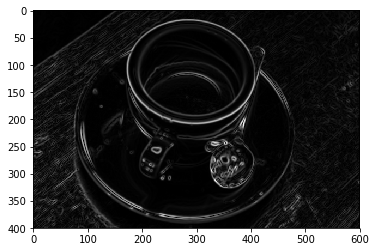

In [13]:
from scipy import ndimage

def sobel_filters(img):
    Kx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], np.float32)
    Ky = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], np.float32)
    
    Ix = ndimage.filters.convolve(img, Kx)
    #convolve x kernel 
    Iy = ndimage.filters.convolve(img, Ky)
    #convolve y kernel 
    
    G = np.hypot(Ix, Iy) #SQRT of SUM of SQUARES
    G = G / G.max() * 255 #norm to 8 bit
    theta = np.arctan2(Iy, Ix)
    
    return (G, theta) #G is gradient matrix, and theta angle 

plot_grey(sobel_filters(smoothed)[0])

## Non-Maximum Suppresion 

Gradient intensity should be uniform --> All white pixels = 255 

*Thin Edges as well 

Go through all points on gradient intensity matrix 

NMS Algo:
* zeros matrix = (Gradient_Matrix shape) 
* get theta from theta matrix --> edge direction 
* if pixel in the same direction > than current --> set current == 0 


In [98]:
def non_max_suppression(gradients, theta_matrix):
    M, N = gradients.shape
    Z = np.zeros((M,N), dtype=np.int32)# create zero matix 
    angle = theta_matrix * 180. / np.pi #convert to deg
    angle[angle < 0] += 180 #add 180 wherever angle (-)

    
    for i in range(1,M-1): #for all rows
        for j in range(1,N-1): #for all columns 
            try:
                q = 255
                r = 255
                
               #angle 0
                if (0 <= angle[i,j] < 22.5) or (157.5 <= angle[i,j] <= 180):
                    q = gradients[i, j+1]
                    r = gradients[i, j-1]
                #angle 45
                elif (22.5 <= angle[i,j] < 67.5):
                    q = gradients[i+1, j-1]
                    r = gradients[i-1, j+1]
                #angle 90
                elif (67.5 <= angle[i,j] < 112.5):
                    q = gradients[i+1, j]
                    r = gradients[i-1, j]
                #angle 135
                elif (112.5 <= angle[i,j] < 157.5):
                    q = gradients[i-1, j-1]
                    r = gradients[i+1, j+1]

                if (gradients[i,j] >= q) and (gradients[i,j] >= r):
                    Z[i,j] = gradients[i,j]
                else:
                    Z[i,j] = 0

            except IndexError as e:
                pass
    
    return Z
grads, thetas= sobel_filters(smoothed)

suppressed = non_max_suppression(grads, thetas)
plot_grey(suppressed)

#https://www.pyimagesearch.com/2018/07/19/opencv-tutorial-a-guide-to-learn-opencv/

NameError: name 'sobel_filters' is not defined

## Double thresholding

Identify strong,weak, and irrelevant pixels 
* Strong = high intensity:: contributes to edge 
* Weak = Too small for possible edge 
* Irrelevant 

High Threshold and Low Threshold 

    > High = Relevant (Strong) 
    < Low = Irrelevant 
    Between = Weak 

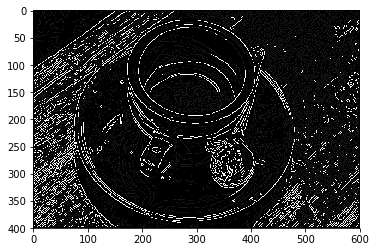

In [34]:

def threshold(img, lowThresholdRatio=0.05, highThresholdRatio=0.09):
    
    highThreshold = img.max() * highThresholdRatio;
    lowThreshold = highThreshold * lowThresholdRatio;
    
    M, N = img.shape
    res = np.zeros((M,N), dtype=np.int32) ##irrelevant is - 
    
    weak = np.int32(25)
    strong = np.int32(255)
    
    strong_i, strong_j = np.where(img >= highThreshold)
    zeros_i, zeros_j = np.where(img < lowThreshold)
    
    weak_i, weak_j = np.where((img <= highThreshold) & (img >= lowThreshold))
    
    res[strong_i, strong_j] = strong
    res[weak_i, weak_j] = weak
    
    return (res, weak, strong)

plot_grey(threshold(suppressed)[0])

## Hystersis 

Convert weak pixels to strong 

If there is s strong pixel near by weak, swtich weak to strong 


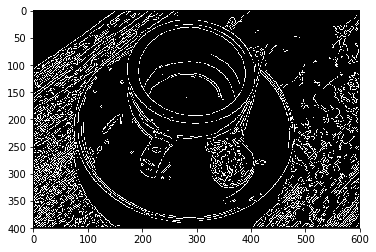

In [39]:
def hysteresis(img, weak, strong=255):
    M, N = img.shape  
    for i in range(1, M-1):
        for j in range(1, N-1):
            if (img[i,j] == weak):
                try:
                    if ((img[i+1, j-1] == strong) or (img[i+1, j] == strong) or (img[i+1, j+1] == strong)
                        or (img[i, j-1] == strong) or (img[i, j+1] == strong)
                        or (img[i-1, j-1] == strong) or (img[i-1, j] == strong) or (img[i-1, j+1] == strong)):
                        img[i, j] = strong
                    else:
                        img[i, j] = 0
                except IndexError as e:
                    pass
    return img

plot_grey(hysteresis(threshold(suppressed)[0],weak=25.0))



In [ ]:
coffee_grey[coffee_grey < 10]=0
np.min(coffee_grey)

In [ ]:
plt.imshow(gaussian_kernel(400),cmap='gray')

In [ ]:
n = np.array([[15,30,15],[30,15,30]])
K=3 
result =np.zeros((K*(n.shape[0]-1)+1,K*(n.shape[1]-1)+1))
result[::max(n.shape),::max(n.shape)] = n
print(result)
for j in np.arange(0,K*(n.shape[0]-2)+1,K).tolist(): ##iterate through rows 
    for i in np.arange(0,K*(n.shape[1]-2)+1,K).tolist():
        OP =abs((result[j][i+K]-result[j][i])/K)
        OP_col = abs((result[j+K][i]-result[j][i])/K)
        for k in range(1,K):
            result[j+1+k-1][i]= k*OP_col + min(result[j+K][i],result[j][i])
            result[j][i+1+k-1]= k*OP + min(result[j][i+K],result[j][i])
            
 
    

result

In [ ]:
n = np.array([[15,30,15],[30,15,30]])
K=3 
result =np.zeros((K*(n.shape[0]-1)+1,K*(n.shape[1]-1)+1))
result[::max(n.shape),::max(n.shape)] = n
print(result)
for row in range(result.shape[0]):
    for i in np.arange(0,K*(n.shape[1]-2)+1,K).tolist():
        OP =abs((result[row][i+K]-result[row][i])/K)
        prev = result[row][i+K]
        for k in range(1,K):
            result[row][i+1+k-1]= k*OP + min(result[row][i+K],result[row][i])
print("\nrows:")
print(result)   


# # for col in range(result.shape[1]):
# for col in np.arange(0,K*(n.shape[1]-1)+1,K).tolist():
#     for j in np.arange(0,K*(n.shape[0]-2)+1,K).tolist(): ##iterate through rows 
#         OP_col = abs((result[j+K][col]-result[j][col])/K)
#         for k in range(1,K):
#             result[j+1+k-1][col]= k*OP_col + min(result[j+K][col],result[j][col])
# result

In [ ]:
np.arange(0,K*(n.shape[0]-2)+1,K)

In [ ]:
n = np.array([[15,30,15],[30,15,30]])
K=3 
result =np.zeros((K*(n.shape[0]-1)+1,K*(n.shape[1]-1)+1))
result[::max(n.shape),::max(n.shape)] = n
print(result)
for j in np.arange(0,K*(n.shape[0]-2)+1,K).tolist():
    for i in np.arange(0,K*(n.shape[1]-2)+1,K).tolist():
        for row in range(result.shape[0]):
            for col in range(result.shape[1]):
                
                OP =abs((result[row][i+K]-result[row][i])/K)
                OP_col = abs((result[j+K][col]-result[j][col])/K)
                for k in range(1,K):
                    result[row][i+1+k-1]= k*OP + min(result[row][i+K],result[row][i])
                    result[j+1+k-1][col]= k*OP_col + min(result[j+K][col],result[j][col])

result

In [ ]:
np.arange(0,result.shape[0],K).tolist()
np.arange(0,K*(n.shape[0]-2)+1,K).tolist()

In [ ]:
n = np.array([[15,30,15],[30,15,30]])
K=3 
result =np.zeros((K*(n.shape[0]-1)+1,K*(n.shape[1]-1)+1))
result[::max(n.shape),::max(n.shape)] = n
result

In [ ]:
np.insert(n, [1,2,3], 0, axis=1)

In [ ]:
p = np.array([[15,30,15],[30,15,30]])
m,n = p.shape
out = np.zeros((m,3*n))
out[:,::3] = p
out

n = np.array([[15,30,15],[30,15,30]])
out =np.zeros((K*(n.shape[0]-1)+1,K*(n.shape[1]-1)+1))
out[:2,::(K)] = n
out

In [ ]:
K

## How to determine size of image:

### $\text{image size}= \text{focal length}*\frac{\text{object height}}{\text{camera distance}}$

In [ ]:
def zero_pad(img,pad_len=5):
    return np.pad(img, (pad_len, pad_len), 'constant')

### Getting an idea of zero padding: border pixels == 0 
Numpy implementation and from scratch implementation for square inputs (whats going on underneath the hood)

In [ ]:
i= np.random.randint(low=0,high=255, size=(5, 5))

def eq(lst):
    return lst[1:] == lst[:-1]

def zeros(l,w):
    return [[0 for col in range(l)] for row in range(w)]

def pad(img,pad_len):
    if type(img) != np.ndarray:
        raise TypeError("Image should be array")
    if  eq(img.shape) == False:
        raise ValueError("Image Must be Square Matrix")
        
    padded = np.zeros(img.shape+2*np.array(pad_len))
    dims= img.shape+2*np.array(pad_len)
    padded= zeros(dims[0],dims[1])
    for i in range(pad_len,len(padded)-pad_len):
        padded[i][pad_len:len(padded)-pad_len] = img.tolist()[i-pad_len]
    return padded

### Numpy implementation
def zero_pad(img,pad_len=5):
    return np.pad(img, (pad_len, pad_len), 'constant')


pad(i,pad_len=2)

plt.imshow(zero_pad(dumb_image,pad_len=10))
plt.title('Effects of 0 Padding')
plt.show()

### Signal 


In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.title('Image Shape: {}'.format(coffee.shape))
plt.imshow(coffee)
plt.subplot(122)
plt.title('Image Shape: {}'.format(coins.shape))
plt.imshow(coins)

In [ ]:
def rgb2gray(rgb):
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray

plt.figure(figsize=(20,10))
plt.subplot(121)
plt.title('Image Greyed Shape: {}'.format(rgb2gray(coffee).shape))
plt.imshow(rgb2gray(coffee))

'Image Shape:', rgb2gray(coffee).shape

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from PIL import Image
from matplotlib import cm
def intensity_plot(input_image):
    
    if len(input_image.shape) > 2:
        raise ValueError("Image must be 2D grey scale")
    # create the x and y coordinate arrays (here we just use pixel indices)
    image_resized= input_image
    xx, yy = np.mgrid[0:image_resized.shape[0], 0:image_resized.shape[1]]

    # create the figure
    fig=plt.figure(figsize=(15,10))
    ax = fig.add_subplot(1, 2, 1)
    plt.subplot(121)
    ax.set_title('Resized Image')
    plt.imshow(image_resized, cmap=cm.coolwarm,)
    ax = fig.add_subplot(1, 2, 2, projection='3d')
    ax.set_title('Intensity Plot')
    ax.plot_surface(xx, yy, image_resized ,rstride=1, cstride=1, cmap=cm.coolwarm,
            linewidth=0)
    ax.grid(False)
    ax.set_zticks([])
    ax.view_init(85, 0)
    plt.show()
    
n=np.random.choice(100)
intensity_plot(data.lfw_subset()[n])

In [ ]:
import os 
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir(os.getcwd()+'/stripe_images') if isfile(join(os.getcwd()+'/stripe_images', f))]
onlyfiles = sorted(onlyfiles)[1:]
plt.figure(figsize=(10,10))
striped_im = {}
for i,image in enumerate(onlyfiles):
    plt.subplot(221+i)
    img = cv.imread('stripe_images/' + str(image))
    img = rgb2gray(np.array(Image.fromarray(img).resize(size=(160,160))))
    striped_im[image.split(".")[0]]=img
    plt.title(image.split(".")[0])
    plt.imshow(img,cmap='gray')
  

### General observations

- vertical stripes ~ horizontally-oriented frequencies
- high frequencies are far from the origin
- diagonal stripes ~ strong diagonal components in FFT
- Images with both horizontal and vertical features have both vertical and horizontal components in FFT

In [ ]:
from scipy import fftpack, ndimage
def plot_spectrum(im_fft):
    from matplotlib.colors import LogNorm
    # A logarithmic colormap
    plt.imshow(np.abs(im_fft), norm=LogNorm(vmin=5))
    plt.colorbar()
    
    
plt.figure(figsize=(10,10))
for i,(stripe,image) in enumerate(striped_im.items()):
    fft2d = fftpack.fft2(image)
    plt.subplot(221+i)
    plot_spectrum(fft2d)
    plt.title('Fourier transform of {}'.format(stripe))


